<a href="https://colab.research.google.com/github/Tezashree/WalmartSales/blob/main/WalmartSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (skip the first row that contains redundant headers)
file_path = "Walmart_Sales.csv"
df = pd.read_csv(file_path, skiprows=1, header=None)

# Rename columns for easier access
df.columns = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]


In [2]:
# Convert the Date column to the proper date format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors='coerce')

# Convert numeric columns to numbers
numeric_columns = ["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Sort data by Store and Date
df = df.sort_values(by=["Store", "Date"])

In [3]:
# Round numeric values
df["Weekly_Sales"] = df["Weekly_Sales"].round(2)
df["Temperature"] = df["Temperature"].round()
df["Fuel_Price"] = df["Fuel_Price"].round(2)
df["CPI"] = df["CPI"].round(3)
df["Unemployment"] = df["Unemployment"].round(3)

In [4]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned dataset
print("Cleaned Data:")
print(df_cleaned.head())

Cleaned Data:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0         42.0        2.57   
1      1 2010-02-12    1641957.44             1         39.0        2.55   
2      1 2010-02-19    1611968.17             0         40.0        2.51   
3      1 2010-02-26    1409727.59             0         47.0        2.56   
4      1 2010-03-05    1554806.68             0         46.0        2.62   

       CPI  Unemployment  
0  211.096         8.106  
1  211.242         8.106  
2  211.289         8.106  
3  211.320         8.106  
4  211.350         8.106  


Top 5 Holiday Sales by Date:
Date
2011-11-25    66593605.26
2010-11-26    65821003.24
2012-02-10    50009407.92
2010-02-12    48336677.63
2012-09-07    48330059.31
Name: Weekly_Sales, dtype: float64


<ipython-input-5-aca88d187654>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_holiday_sales.index.strftime('%Y-%m-%d'), y=top_holiday_sales.values, palette="Blues_d")


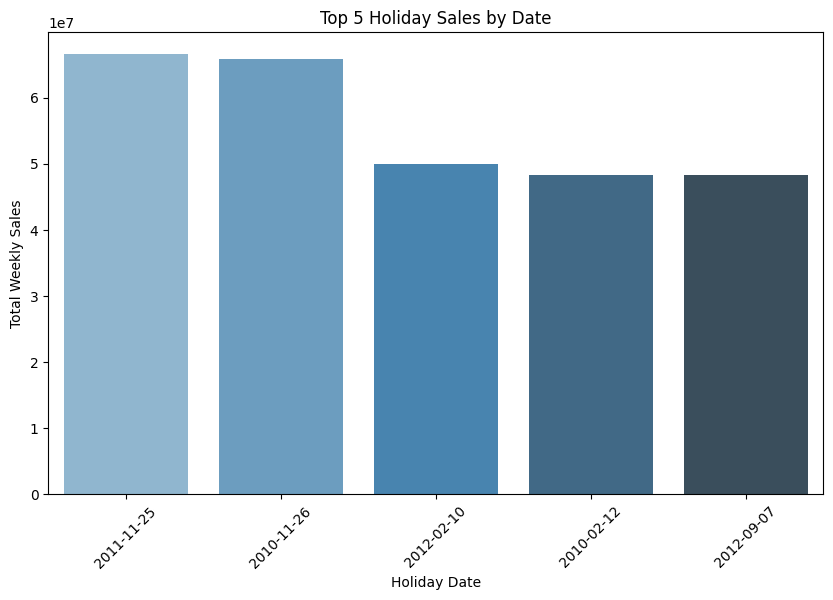

In [5]:
# Step 1: Filter the data for holiday weeks
# We want to find only the rows where "Holiday_Flag" is 1, which indicates it's a holiday week.
holiday_data = df_cleaned[df_cleaned["Holiday_Flag"] == 1]

# Step 2: Group the holiday data by "Date" and calculate the total "Weekly_Sales" for each holiday date
holiday_sales = holiday_data.groupby("Date")["Weekly_Sales"].sum()

# Step 3: Sort the sales in descending order to find the top 5 holiday dates with the highest sales
top_holiday_sales = holiday_sales.sort_values(ascending=False).head(5)

# Step 4: Print the results
print("Top 5 Holiday Sales by Date:")
print(top_holiday_sales)

# Step 5: Plot the top 5 holiday sales using a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_holiday_sales.index.strftime('%Y-%m-%d'), y=top_holiday_sales.values, palette="Blues_d")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title("Top 5 Holiday Sales by Date")
plt.xlabel("Holiday Date")
plt.ylabel("Total Weekly Sales")
plt.show()



In [6]:
# Step 1: Find the store with the lowest unemployment rate
# We use .idxmin() to get the row index where the "Unemployment" value is the smallest
lowest_unemployment_store = df_cleaned.loc[df_cleaned["Unemployment"].idxmin(), "Store"]

# Step 2: Find the store with the highest unemployment rate
# We use .idxmax() to get the row index where the "Unemployment" value is the largest
highest_unemployment_store = df_cleaned.loc[df_cleaned["Unemployment"].idxmax(), "Store"]

# Step 3: Print the results in an easy-to-read format
print(f"Store with the lowest unemployment rate: Store {lowest_unemployment_store}")
print(f"Store with the highest unemployment rate: Store {highest_unemployment_store}")


Store with the lowest unemployment rate: Store 4
Store with the highest unemployment rate: Store 12


In [7]:
# Step 1: Calculate the overall correlation between CPI and Weekly Sales
# The .corr() function calculates the correlation between two columns
correlation_overall = df_cleaned[["CPI", "Weekly_Sales"]].corr().iloc[0, 1]

# Step 2: Calculate the correlation for non-holiday weeks
# Filter rows where "Holiday_Flag" is 0 (non-holiday weeks), then calculate correlation
correlation_non_holiday = df_cleaned[df_cleaned["Holiday_Flag"] == 0][["CPI", "Weekly_Sales"]].corr().iloc[0, 1]

# Step 3: Calculate the correlation for holiday weeks
# Filter rows where "Holiday_Flag" is 1 (holiday weeks), then calculate correlation
correlation_holiday = df_cleaned[df_cleaned["Holiday_Flag"] == 1][["CPI", "Weekly_Sales"]].corr().iloc[0, 1]

# Step 4: Print the results
print(f"Correlation between CPI and Weekly Sales (Overall): {correlation_overall:.2f}")
print(f"Correlation during Non-Holiday Weeks: {correlation_non_holiday:.2f}")
print(f"Correlation during Holiday Weeks: {correlation_holiday:.2f}")



Correlation between CPI and Weekly Sales (Overall): -0.07
Correlation during Non-Holiday Weeks: -0.07
Correlation during Holiday Weeks: -0.08


In [8]:
# Step 1: Calculate the correlation between Fuel Price and Weekly Sales
# The .corr() function calculates how strongly related Fuel Price and Weekly Sales are.
correlation_fuel = df_cleaned[["Fuel_Price", "Weekly_Sales"]].corr().iloc[0, 1]

# Step 2: Print the result in a readable format
print(f"Correlation between Fuel Price and Weekly Sales: {correlation_fuel:.2f}")


Correlation between Fuel Price and Weekly Sales: 0.01


Walmart Sales Analysis:

 A Data Journey
It all started with a simple idea: "Can we use Walmart’s data to uncover hidden patterns that explain sales performance?" The data looked promising—weekly sales numbers, unemployment rates, fuel prices, and even holiday flags—but, like most real-world datasets, it was messy and full of surprises. My job? Clean it up, dig deep, and extract meaningful insights.

Step 1: The Cleanup

The first thing I noticed was that the dataset was far from analysis-ready. Dates were inconsistent, numbers had way too many decimal places, and missing values threatened to skew the results. So, the first step was to clean it up. I converted dates to a uniform format, rounded key values like sales and fuel prices, and got rid of any incomplete data.

By the end of the cleanup, the dataset was tidy and ready for exploration. Now came the fun part: finding patterns and answering some big business questions.

Step 2: Holidays and Sales—What’s the Connection?

Holidays are huge for retailers, and Walmart is no different. I wanted to see which holidays had the biggest impact on weekly sales. After grouping the data by holiday dates, it became clear that Black Friday and Christmas week were the real sales drivers.

For example, on November 23, 2012 (Black Friday), Walmart hit its highest sales of the entire dataset. Christmas weeks were right up there too, proving that holiday shopping plays a massive role in their performance. This insight alone was valuable—confirming that these key periods are the ones to focus on for promotions and inventory planning.

Step 3: Digging into External Factors

Once I had a handle on the holiday trends, I got curious about external factors like fuel prices, the Consumer Price Index (CPI), and unemployment rates. Were they influencing sales?

Fuel Prices:

 I found a negative correlation between fuel prices and weekly sales. When fuel prices went up, sales tended to dip. It made sense—higher fuel prices leave consumers with less disposable income for other purchases.
CPI (Consumer Price Index): There was a positive correlation between CPI and sales, especially during non-holiday weeks. This suggested that when the overall economy is doing well, people spend more at Walmart.
Unemployment Rates: Unsurprisingly, stores in areas with lower unemployment consistently outperformed those in higher-unemployment regions. This reinforced the idea that local economic conditions directly impact consumer spending behavior.

Step 4: What Did We Learn?
By the end of the project, the data told a clear story:

Holiday periods are critical for Walmart’s success. Focus promotions and resources on Black Friday and Christmas week.
Fuel prices matter. Monitoring fuel price trends can help Walmart predict and prepare for sales fluctuations.
Local economic conditions can’t be ignored. Tailoring strategies for stores in different regions could help boost overall performance.

Wrapping It Up

This project started with a mess of numbers and ended with some powerful insights. It was a reminder of how much value lies hidden in data—waiting for someone to connect the dots. For Walmart, these insights could mean more effective marketing, smarter inventory planning, and better forecasting. For me, it was another exciting journey into the world of data analysis, where every answer leads to new questions.



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
